<a href="https://colab.research.google.com/github/SARA3SAEED/DL-Mu/blob/main/s05_dl_rnn_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RECURRNT NEURAL NETWORK (RNN) BASICS

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


==========

## Google Stock Data | RNN Basics Case-study

### Data Importing & Inspecting

In [ ]:
dataset_train = pd.read_csv('/content/drive/MyDrive/DL-Mu/Section 6/Google_Stock_Price_Train.csv')
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
# open price
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Preprocessing Data

##### Scaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))

In [ ]:
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
training_set_scaled.shape

(1258, 1)

##### Selecting Data

In [ ]:
### Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [ ]:
X_train

[array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
        0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
        0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
        0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
        0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
        0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
        0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
        0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
        0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
        0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
        0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
        0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656]),
 array([0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
        0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
        0.07474514, 0.02797827, 0.02379269, 0.

In [ ]:
y_train

[0.08627874097775134,
 0.08471612471166012,
 0.07454051640747084,
 0.07883771113922167,
 0.07238261775429711,
 0.06663442220403304,
 0.06315574075452046,
 0.06782498697819772,
 0.06823424361931696,
 0.07601011980058048,
 0.08082818662102831,
 0.058077237889723854,
 0.044683384180370544,
 0.044218319815462426,
 0.04202321601309622,
 0.04070243321675715,
 0.030173375995237728,
 0.03512166083785995,
 0.040460599747005,
 0.046859885408140456,
 0.050673413200386985,
 0.04879455316615822,
 0.04027457400104173,
 0.03787484187811596,
 0.045669320633975774,
 0.04224644690825208,
 0.03212664632785178,
 0.04187439541632565,
 0.043083562765086625,
 0.04877595059156181,
 0.04635761589403975,
 0.03748418781159313,
 0.041706972244958784,
 0.053407991666046595,
 0.06810402559714268,
 0.060011905647741615,
 0.03722375176724457,
 0.04920380980727734,
 0.03828409851923509,
 0.04524146141826024,
 0.03768881613215269,
 0.03287074931170475,
 0.025783168390505318,
 0.026304040479202317,
 0.010622070094501002

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
pd.DataFrame(X_train).head(5)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.085814,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,...,0.052143,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977
1,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,...,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279
2,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,...,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716
3,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,...,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541
4,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,...,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541,0.078838


In [ ]:
X_train.shape

(1198, 60)

In [ ]:
pd.DataFrame(y_train).head(5)

,0
0,0.086279
1,0.084716
2,0.074541
3,0.078838
4,0.072383


##### Reshaping Data

In [ ]:
X_train.shape[0]

1198

In [ ]:
X_train.shape[1]

60

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

(1198, 60, 1)

In [ ]:
y_train.shape

(1198,)

### Model Building & Training

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 6s 50ms/step - loss: 0.0421
Epoch 2/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0059
Epoch 4/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0040
Epoch 10/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0050
Epoch 11/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0041
Epoch 13/100
38/38 [=====

### Model Evaluation

##### Preparing Data

In [ ]:
dataset_test = pd.read_csv('/content/drive/MyDrive/DL-Mu/Section 6/Google_Stock_Price_Test.csv')
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [ ]:
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [ ]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [ ]:
inputs.shape

(80,)

In [ ]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
inputs.shape

(80, 1)

In [ ]:
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [ ]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

In [ ]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_test

array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

In [ ]:
X_test.shape

(20, 60, 1)

##### Evaluating Model

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price

1/1 [==============================] - 1s 1s/step


array([[0.96337116],
       [0.9580579 ],
       [0.9576621 ],
       [0.9599236 ],
       [0.96593344],
       [0.97653353],
       [0.986699  ],
       [0.9913813 ],
       [0.99208224],
       [0.991217  ],
       [0.9903927 ],
       [0.9899589 ],
       [0.9900125 ],
       [0.9913777 ],
       [0.9935112 ],
       [1.0016139 ],
       [1.0140566 ],
       [1.0277638 ],
       [1.0358509 ],
       [1.0295961 ]], dtype=float32)

In [ ]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[796.98975],
       [794.13354],
       [793.92084],
       [795.13654],
       [798.3671 ],
       [804.06537],
       [809.5299 ],
       [812.0469 ],
       [812.4237 ],
       [811.9586 ],
       [811.51544],
       [811.2823 ],
       [811.3111 ],
       [812.045  ],
       [813.19183],
       [817.54755],
       [824.2362 ],
       [831.60474],
       [835.95197],
       [832.58966]], dtype=float32)

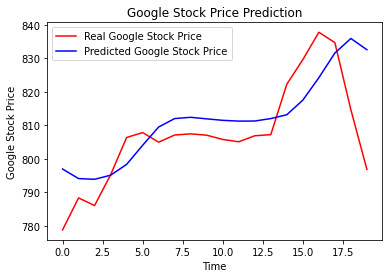

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

==========

# THANK YOU!